# Esercitazione 12

In questa esercitazione l'obiettivo è quello di riconoscere, distinguere e classificare dieci cifre scritte a mano (in questo caso le 10 categorie sono rappresentate dai numeri interi nell'intervallo [0-9]) tramite delle reti neurali profonde. 
Il dataset di training e validazione per le reti è MNIST, che comprende $7\cdot10^4$ cifre scritte a mano.
Ogni cifra è rappresentata in un'immagine quadrata, divisa in una griglia di 28×28 pixel. Ciascun pixel è caratterizzato da una scala di colore grigio che và da 0 a 256.

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

In [2]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D
from PIL import Image
import os

### Exercizio 12.1

Come prima richiesta testiamo le prestazioni di una rete neurale profonda (DNN) variando il solo ottimizzatore. Utilizziamo nello specifico dapprima lo Statistic Gradient Descent (SGD), poi Adam e infine Adagrad. Per ciascuno di questi studiamo l'andamento di loss e accuracy.



Inizialmente i dati vengono convertiti in vettori 10-dimensionali in cui l'unica componente non azzerata è quella corrispondente alla cifra associata all'immagine.
Negli hidden layers della rete è stata scelta come funzione di attivazione la relu e per il layer di output la softmax. Quest'ultima è stata scelta poichè in grado di generare un risultato finale sotto forma di una serie di probabilità, una per ognuna delle categorie possibili. In questo modo la casella contenente la probabilità più alta corrisponde alla cifra associata dalla rete all'immagine analizzata.

Per tutti e tre i casi ho deciso di allenare la DNN con 10 epoche. 

In [3]:
seed=0
np.random.seed(seed)
tensorflow.random.set_seed(seed)

img_rows, img_cols = 28, 28 
num_classes = 10  
#Dati separati in training e test:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#Ho bisogno delle immagini di test in forma matriciale 28x28: 
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

#Lancio i float a singola precisione:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Riscalamento dei dati nell'intervallo [0,1]
X_train /= 255
X_test /= 255

#Vogliamo ora che l'identificazione dell'immagine "numero" sia codificata in un vettore di 0 e 1.
Y_train = tensorflow.keras.utils.to_categorical(Y_train, num_classes)
Y_test = tensorflow.keras.utils.to_categorical(Y_test, num_classes)
#print('X_train shape:', X_train.shape)
#print('Y_train shape:', Y_train.shape)

In [4]:
#Creazione dell'architettura della rete neurale DNN:
def create_DNN():
    model = Sequential()                                 #Inizializzazione del modello sequenziale
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))             #Layer relu densamente collegato
    model.add(Dropout(0.5))                              #Layer di Dropout con rate 0.5
    model.add(Dense(num_classes, activation='softmax'))  #Soft-max layer
    return model

#Creazione del modello e compilazione:
def compile_model_sgd():
    model=create_DNN()   
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=SGD(),metrics=['accuracy'])
    return model
def compile_model_adam():
    model=create_DNN()   
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
    return model
def compile_model_adagrad():
    model=create_DNN()   
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adagrad(),metrics=['accuracy'])
    return model

In [5]:
#Training della rete DNN con ottimizzatore SGD: 
model_DNN_sgd = compile_model_sgd()
h_sgd = model_DNN_sgd.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=0, validation_data=(X_test, Y_test))

##### Ottimizzatore: SGD

Ottimizzatore: sgd
Test loss: 0.10885918885469437
Test accuracy: 0.9656000137329102


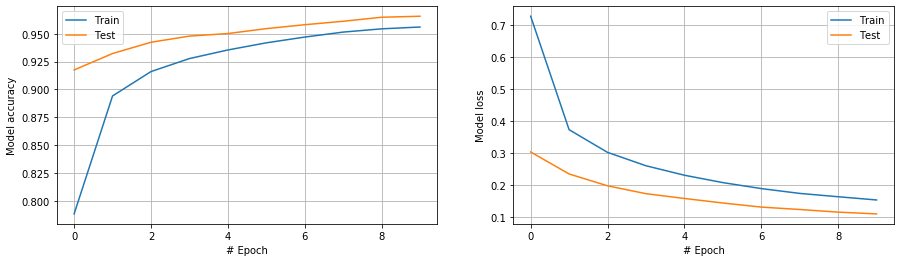

In [6]:
#Osserviamo le performance per una valutazione del modello con ottimizzatore sgd
score = model_DNN_sgd.evaluate(X_test, Y_test, verbose=0)  
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(h_sgd.history['accuracy'])
plt.plot(h_sgd.history['val_accuracy'])
plt.ylabel('Model accuracy')
plt.xlabel('# Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(h_sgd.history['loss'])
plt.plot(h_sgd.history['val_loss'])
plt.ylabel('Model loss')
plt.xlabel('# Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

Di seguito abbiamo un esempio di predizione della rete:


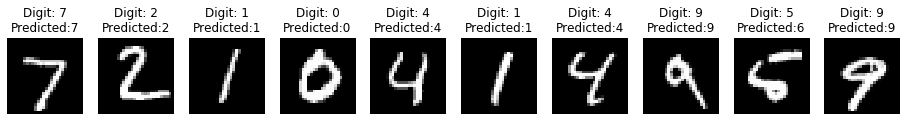

In [7]:
predictions = model_DNN_sgd.predict(X_test)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

print("Di seguito abbiamo un esempio di predizione della rete:")
plt.figure(figsize=(16, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In [8]:
#Dati separati in training e test:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#Ho bisogno delle immagini di test in forma matriciale 28x28: 
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

#Lancio i float a singola precisione:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Riscalamento dei dati nell'intervallo [0,1]
X_train /= 255
X_test /= 255

#Vogliamo ora che l'identificazione dell'immagine "numero" sia codificata in un vettore di 0 e 1.
Y_train = tensorflow.keras.utils.to_categorical(Y_train, num_classes)
Y_test = tensorflow.keras.utils.to_categorical(Y_test, num_classes)

#Training della rete DNN con ottimizzatore Adam: 
model_DNN_adam = compile_model_adam()
h_adam = model_DNN_adam.fit(X_train, Y_train, batch_size=32, epochs=10,verbose=0, validation_data=(X_test, Y_test))

##### Ottimizzatore: Adam

Ottimizzatore: Adam
Test loss: 0.08677840232849121
Test accuracy: 0.9817000031471252


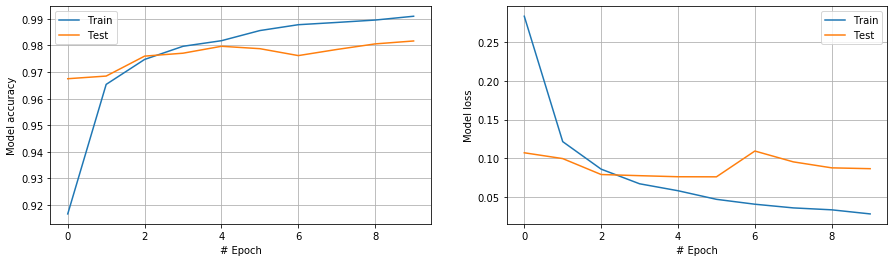

In [9]:
#Osserviamo le performance per una valutazione del modello con ottimizzatore Adam
score = model_DNN_adam.evaluate(X_test, Y_test, verbose=0)  
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(h_adam.history['accuracy'])
plt.plot(h_adam.history['val_accuracy'])
plt.ylabel('Model accuracy')
plt.xlabel('# Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(h_adam.history['loss'])
plt.plot(h_adam.history['val_loss'])
plt.ylabel('Model loss')
plt.xlabel('# Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

Di seguito abbiamo un esempio di predizione della rete:


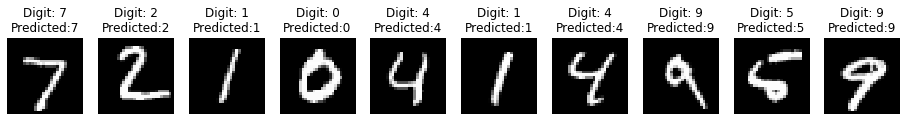

In [10]:
predictions = model_DNN_adam.predict(X_test)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

print("Di seguito abbiamo un esempio di predizione della rete:")
plt.figure(figsize=(16, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In [11]:
#Dati separati in training e test:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#Ho bisogno delle immagini di test in forma matriciale 28x28: 
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

#Lancio i float a singola precisione:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Riscalamento dei dati nell'intervallo [0,1]
X_train /= 255
X_test /= 255

#Vogliamo ora che l'identificazione dell'immagine "numero" sia codificata in un vettore di 0 e 1.
Y_train = tensorflow.keras.utils.to_categorical(Y_train, num_classes)
Y_test = tensorflow.keras.utils.to_categorical(Y_test, num_classes)

#Training della rete DNN con ottimizzatore Adagrad: 
model_DNN_adagrad = compile_model_adagrad()
h_adagrad = model_DNN_adagrad.fit(X_train,Y_train,batch_size=32,epochs=10,verbose=0,validation_data=(X_test, Y_test))

##### Ottimizzatore: Adagrad

Ottimizzatore: Adagrad
Test loss: 0.2542266249656677
Test accuracy: 0.9273999929428101


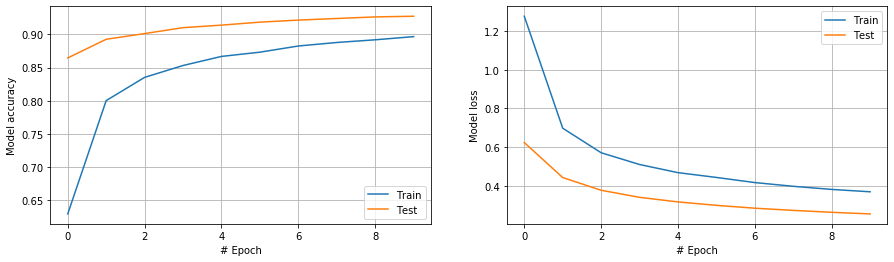

In [12]:
#Osserviamo le performance per una valutazione del modello con ottimizzatore Adagrad
score = model_DNN_adagrad.evaluate(X_test, Y_test, verbose=0)  
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(h_adagrad.history['accuracy'])
plt.plot(h_adagrad.history['val_accuracy'])
plt.ylabel('Model accuracy')
plt.xlabel('# Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(h_adagrad.history['loss'])
plt.plot(h_adagrad.history['val_loss'])
plt.ylabel('Model loss')
plt.xlabel('# Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

Di seguito abbiamo un esempio di predizione della rete:


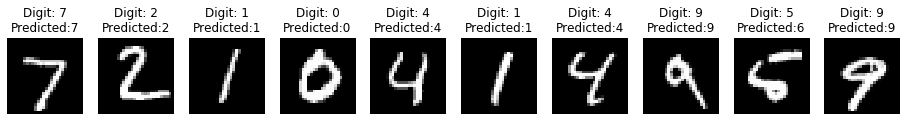

In [13]:
predictions = model_DNN_adagrad.predict(X_test)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

print("Di seguito abbiamo un esempio di predizione della rete:")
plt.figure(figsize=(16, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Andiamo ora a commentare i risultati ottenuti. 

Nel primo caso l'ottimizzatore è lo Stochastic Gradient Descent. Come possiamo osservare la loss descresce all'aumentare del numero delle epoche sia per il dataset di training sia per il dataset di validazione. In particolare il comportamento per quest'ultimo è sintomo del fatto che non siamo ancora in una fase di overfitting e che, aumentando ulteriormente il numero delle epoche, è ancora possibile migliorare le performance della rete. 
Notiamo che le prestazioni in fase di training sono peggiori rispetto a quelle di validazione. Questo dato è dovuto inevitabilmente all'utilizzo di un layer di dropout. Quest'ultimo spegne alcuni neuroni solo in fase di training in modo tale da rendere la rete meno sensibile ai pesi specifici dei neuroni. Questo a sua volta si traduce in una rete che è capace di una migliore generalizzazione ed è meno probabile che si adatti troppo ai dati di training. 
L'accuracy invece presenta il comportamento opposto e cresce fino a stanziarsi al dì sopra del $90\%$. Dunque il potere predittivo della rete è molto buono, ma ciò potrebbe dipendere dal fatto che le cifre di validazione appartengono allo stesso dataset di quelle di training.

Nel secondo caso viene utilizzato come ottimizzatore Adam e possiamo osservare che, se da una parte i valori della loss sono più bassi sia per il set di validazione che per il set di training, dall'altra, all'aumentare delle epoche, la distanza tra la loss di training e la loss di validazione cresce. Per questo motivo potremmo ipotizzare che la rete è  in questo caso più vicina ad un overfitting dei dati.

Nel terzo caso adoperiamo Adagrad e i risultati sono molto simili a quelli ottenuti con lo Stochastic Gradient Descent.

Procederemo d'ora in avanti utilizzando come ottimizzatore lo Stochastic Gradient Descent.

### Exercise 12.2

In questo esercizio dobbiamo costruire una rete neurale convoluzionale (CNN) e, come fatto in precedenza con la DNN, elaborare i dati dal dataset MNIST. La CNN che segue è costituita da layer convoluzionali, da layer completamente connessi, da layer di pooling, uno flatten e un layer di dropout. Osserviamo che il layer di output è fully connected al fine di convertire la matrice d'immagine in una matrice di classificazione.

In [21]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [22]:
def create_CNN():
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5), input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer='SGD',metrics=['accuracy'])
    return model

In [23]:
model_CNN=create_CNN()
model_CNN.fit(X_train, Y_train,batch_size=32,epochs=10,verbose=1,validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.7179 - accuracy: 0.7974 - val_loss: 0.1974 - val_accuracy: 0.9474
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2283 - accuracy: 0.9352 - val_loss: 0.1284 - val_accuracy: 0.9628
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1711 - accuracy: 0.9512 - val_loss: 0.0976 - val_accuracy: 0.9705
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1403 - accuracy: 0.9600 - val_loss: 0.0807 - val_accuracy: 0.9754
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1226 - accuracy: 0.9650 - val_loss: 0.0712 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1078 - accuracy: 0.9690 - val_loss: 0.0611 - val_accuracy: 0.9799
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0995 - accuracy: 0.9708 - val_loss: 0.0559 -

Test loss: 0.04967140778899193
Test accuracy: 0.9835000038146973


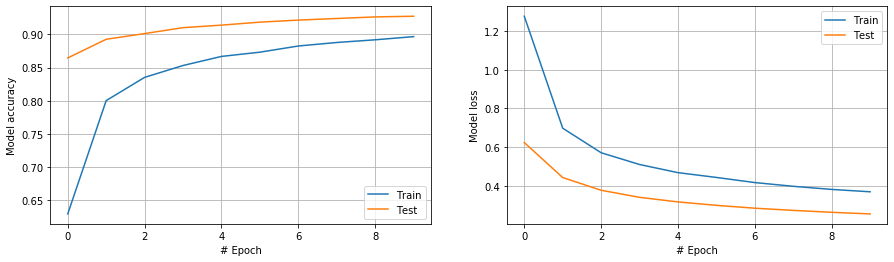

In [24]:
score = model_CNN.evaluate(X_test, Y_test, verbose=0)  
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(h_adagrad.history['accuracy'])
plt.plot(h_adagrad.history['val_accuracy'])
plt.ylabel('Model accuracy')
plt.xlabel('# Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(h_adagrad.history['loss'])
plt.plot(h_adagrad.history['val_loss'])
plt.ylabel('Model loss')
plt.xlabel('# Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

Come nel caso della DNN con ottimizzatore SGD, la CNN presenta una loss di validazione sempre inferiore a quella di training. Alla conclusione delle 10 epoche il potere predittivo  della CNN è di poco superiore rispetto a quello della DNN. mentre la loss è inferiore. Sembra dunque che in base a questi dati quantitativi la CNN sia migliore rispetto alla DNN per quanto riguarda la classificazione di immagini. Andiamo dunque a testare questa affermazione su dati al di fuori del dataset MNIST. 

### Exercise 12.3

Utilizzando l'applicazione `gimp`, creo 10 immagini di cifre scritte a mano al fine di testare su questo nuovo dataset la mia rete neurale convoluzionale.

Predizioni ottenute grazie alla rete CNN:


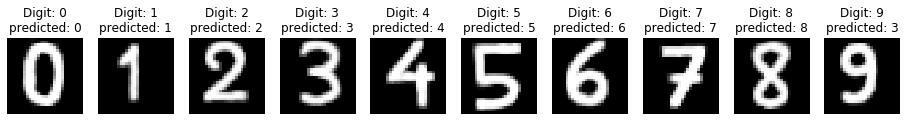

In [25]:
print("Predizioni ottenute grazie alla rete CNN:")
plt.figure(figsize=(16, 3))  
for i in range(0,10,1):
    digit_filename = '../../Esercizio12/'+str(i)+'.png'
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    px=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for k in range(xdim):
            data[k,j]=px[j,k]
    data /= 255
    data = data.reshape(1,xdim,ydim,1)
    pred_0 = model_CNN.predict(data)
    data = data.reshape(xdim,ydim)

    plt.subplot(1,10,i+1)
    plt.imshow(data, cmap='gray')    
    plt.title("Digit: "+str(i)+"\npredicted: {}".format(np.argmax(pred_0)))
    plt.axis('off') 
plt.show()

Predizioni ottenute grazie alla rete DNN:


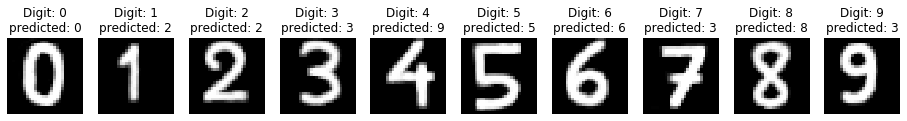

In [19]:
print("Predizioni ottenute grazie alla rete DNN:")
for i in range(10):
    digit_filename = '../../Esercizio12/'+str(i)+'.png'
    digit_in = Image.open(digit_filename).convert('L')  
    if i==0:
        ydim, xdim = digit_in.size
        data = np.zeros((10,xdim, ydim))
    pix=digit_in.load();
    for k in range(ydim):
        for j in range(xdim):
            data[i,j,k]=pix[k,j]
data /= 255
data = data.reshape(10,xdim*ydim)
predictions = model_DNN_sgd.predict(data)
data = data.reshape(10,xdim,ydim)

plt.figure(figsize=(16, 3)) 
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(data[i], cmap='gray')    
    plt.title("Digit: "+str(i)+"\npredicted: {}".format(np.argmax(predictions[i])))
    plt.axis('off') 
plt.show()

Come possiamo notare dai risultati ottenuti sul dataset nuovo, le prestazioni in termini di potere predittivo della rete sono a favore della rete neurale convoluzionale CNN.